In [2]:
import pandas as pd
import csv
import gensim
import numpy as np
import nltk
from nltk.tokenize import RegexpTokenizer
from scipy import spatial
import plotly.plotly as py
import plotly.graph_objs as go
import matplotlib.pyplot as plt
from collections import Counter
# Download these lists
# nltk.download('punkt')
# nltk.download('stopwords')

In [3]:
# Import all the datasets first
# Movie Titles Metadata.txt
mtm = 'cornell movie-dialogs corpus/movie_titles_metadata.txt'
# CSV for transforming the data
mtm_csv = 'mtm_csv.csv'

In [10]:
# Add header rows
with open(mtm_csv, 'wt') as csv_file:
    writer = csv.DictWriter(csv_file, fieldnames = ["Movie_Number", "Movie_Name", "Year_of_Release", 
                                                   "IMDB_Rating", "Number_of_Votes", "Genres"])
    writer.writeheader()

In [11]:
# Open the .txt file and write it onto the dataframe
with open(mtm, 'r', encoding = 'latin-1') as mtmeta:
    for lines in mtmeta:
        text = str(lines)
        line_list = text.split('+++$+++')
        
        with open(mtm_csv, 'a') as write_csv:
            writer = csv.writer(write_csv)
            writer.writerow([line_list[0].strip(), line_list[1].strip(), line_list[2].strip(),
                            line_list[3].strip(), line_list[4].strip(), line_list[5].strip()])

In [12]:
# Check the content of the csv file
mtm_df = pd.read_csv(mtm_csv, index_col = False, encoding='latin-1')
print(mtm_df.shape)
mtm_df.head(5)

(617, 6)


,Movie_Number,Movie_Name,Year_of_Release,IMDB_Rating,Number_of_Votes,Genres
0,m0,10 things i hate about you,1999,6.9,62847,"['comedy', 'romance']"
1,m1,1492: conquest of paradise,1992,6.2,10421,"['adventure', 'biography', 'drama', 'history']"
2,m2,15 minutes,2001,6.1,25854,"['action', 'crime', 'drama', 'thriller']"
3,m3,2001: a space odyssey,1968,8.4,163227,"['adventure', 'mystery', 'sci-fi']"
4,m4,48 hrs.,1982,6.9,22289,"['action', 'comedy', 'crime', 'drama', 'thrill..."


In [13]:
mtm_df.Genres.describe()

count           617
unique          290
top       ['drama']
freq             34
Name: Genres, dtype: object

In [14]:
list1 = []
list1 = mtm_df.Genres.unique()
list1 = list1.tolist()

In [15]:
list2 = []
for j in list1:
    j=j.replace('[',"")
    j=j.replace(']',"")
    j=j.replace("'","")
    j=j.split(", ")
    for items in j:
        list2.append(items)

In [16]:
list2 = set(list2)
print(len(list2))

25


In [17]:
list2 = [w for w in list2 if not w in ['short', 'western', 'adult']]
print(len(list2))

22


In [18]:
list2

['',
 'horror',
 'comedy',
 'music',
 'crime',
 'history',
 'animation',
 'thriller',
 'biography',
 'documentary',
 'action',
 'musical',
 'family',
 'mystery',
 'fantasy',
 'drama',
 'adventure',
 'sport',
 'film-noir',
 'romance',
 'war',
 'sci-fi']

In [19]:
try:
    model = gensim.models.KeyedVectors.load_word2vec_format('../Google_Billion_Word_Corpus/GoogleNews-vectors-negative300.bin', binary=True)
except Exception as e:
    print(e)

In [20]:
# Dictionary for our genres
dict1 = {}
for i in list2:
    try:
        dict1[i] = model[i]
    except:
        pass

In [21]:
dict1

{'horror': array([ 2.08984375e-01, -6.78710938e-02,  1.27929688e-01,  2.25585938e-01,
        -1.38671875e-01, -3.14941406e-02, -5.66406250e-02, -8.15429688e-02,
         2.87109375e-01,  1.82617188e-01,  7.17773438e-02, -2.83203125e-01,
         8.25195312e-02,  1.51367188e-01, -6.25000000e-02,  3.68118286e-04,
        -2.61230469e-02,  1.54296875e-01, -1.25976562e-01, -4.08935547e-03,
         1.24023438e-01,  2.10937500e-01,  2.18505859e-02, -3.49121094e-02,
         2.23632812e-01, -1.72119141e-02,  1.05957031e-01,  5.49316406e-02,
         3.26171875e-01, -1.85546875e-01, -1.42578125e-01,  3.83300781e-02,
         1.00097656e-02, -1.06445312e-01, -2.96875000e-01, -3.83300781e-02,
         3.94531250e-01,  1.48437500e-01, -1.74560547e-02,  8.00781250e-02,
         1.41601562e-01, -2.94921875e-01,  2.24609375e-02,  5.29785156e-02,
        -2.28515625e-01,  7.12890625e-02,  3.71093750e-01,  8.78906250e-02,
         1.75781250e-01,  1.13281250e-01, -3.00781250e-01,  5.88378906e-02,
  

In [22]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

In [23]:
print("Does it include the stop words like \'a\', \'and\', \'the\'? %d %d %d" % ('a' in model.vocab, 'and' in model.vocab, 'the' in model.vocab))

Does it include the stop words like 'a', 'and', 'the'? 0 0 1


In [24]:
ml_df = pd.read_csv('ml_csv.csv', index_col = False, encoding='latin-1')

In [111]:
# Lets, import the dataframe
mc_df = pd.read_csv("mc_csv.csv", index_col = False, encoding='latin-1')

In [112]:
mcm_df = pd.read_csv("mcm_csv.csv", index_col = False, encoding='latin-1')

In [108]:
# So, the columns here in this dataset mention that characterId1 
# is the charcter speking to characterId2 in each movies
mc1_df = mc_df.loc[mc_df['Movie_Number'] == 'm101']
ml1_df = ml_df.loc[ml_df['Movie_Number'] == 'm101']

In [109]:
mtm_df[mtm_df['Movie_Number'] == 'm101']

,Movie_Number,Movie_Name,Year_of_Release,IMDB_Rating,Number_of_Votes,Genres
101,m101,the insider,1999,8.0,69660,"['biography', 'drama', 'thriller']"


# For checking the genres of each movie dialogue with the entire genres in our dataset
 Using cosine similairties and word2vec model


In [81]:
tokenizer = RegexpTokenizer(r'\w+')

dict3 = {}
index1 = 0

# For a single dialogue
for index, rows in mc1_df.iterrows():
    s = rows[3]
    l = s.split('\'')[1::2]
    for _ in l:
        index1 += 1 
        val2 = {}
        av = np.zeros(300)
        line = ml1_df.loc[ml1_df['Line_Id'] == _, 'Dialogue'].iloc[0]
        print(line)
        line = tokenizer.tokenize(line)
        line = [i.lower() for i in line]
        line = [w for w in line if not w in stop_words]
        print(line)
        l1 = len(line)
        for tokens in line:
#             print(model[tokens])
            try:
                av += model[tokens]
            except:
                l1 -= 1
                pass
        av = av/l1
#         print(av)
        # Cosine similarities
        for key, vals in dict1.items():
            try:
                val2[key] = 1 - spatial.distance.cosine(av, vals)
            except:
                pass
        print(val2)
        m = max(val2, key = val2.get)
        print(m, val2[m])
        dict3[index1] = m

Hi, honey.
['hi', 'honey']
{'horror': 0.06672024946751853, 'comedy': 0.16455604187563444, 'music': 0.19511354918742363, 'crime': 0.10550564547418251, 'history': -0.03115127243720539, 'animation': 0.17347028327091485, 'thriller': 0.004567344694371145, 'biography': 0.04785720009970629, 'documentary': 0.04915198209389271, 'action': -0.04963678755078438, 'musical': 0.1011986226581304, 'family': 0.13465954297316562, 'mystery': 0.1114069553829804, 'fantasy': 0.08847965068936303, 'drama': 0.06401701809453852, 'adventure': 0.06323539389667077, 'sport': 0.026527795194288495, 'romance': 0.20935242547541133, 'war': 0.022042903652934376}
romance 0.20935242547541133
Hi, Daddy.
['hi', 'daddy']
{'horror': 0.08748501770186445, 'comedy': 0.09545209014548928, 'music': 0.18531257099859044, 'crime': 0.10857962546620892, 'history': 0.009418262535707878, 'animation': 0.1735923535898496, 'thriller': 0.019780477399112262, 'biography': 0.10064347467016588, 'documentary': 0.036919122733425236, 'action': 0.02614

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning:

invalid value encountered in true_divide




family 0.15878159850986417
Since when has the paragon of investigative journalism allowed lawyers to determine the news content on "60 Minutes"?
['since', 'paragon', 'investigative', 'journalism', 'allowed', 'lawyers', 'determine', 'news', 'content', '60', 'minutes']
{'horror': 0.1876684792545935, 'comedy': 0.19204607071606483, 'music': 0.22317021807148074, 'crime': 0.27413046333157043, 'history': 0.21300233225740883, 'animation': 0.21735907934775878, 'thriller': 0.17452223061081096, 'biography': 0.22958060189061646, 'documentary': 0.2655566721568632, 'action': 0.1689324931764863, 'musical': 0.14338680298970186, 'family': 0.16968186212366587, 'mystery': 0.2412026026462527, 'fantasy': 0.20476612392096938, 'drama': 0.24322872696914632, 'adventure': 0.13589369646968874, 'sport': 0.2010663646634987, 'romance': 0.12383413059590209, 'war': 0.17163937116532524}
crime 0.27413046333157043
It's an alternate version. So what if we have an alternate version? And I don't think her being cautious i

Okay.  Lowell?
['okay', 'lowell']
{'horror': 0.13634741907763204, 'comedy': 0.14952367824142343, 'music': 0.08784477743439967, 'crime': 0.05113009086380793, 'history': 0.004688265959289173, 'animation': 0.10982883520256137, 'thriller': 0.05213528062495021, 'biography': -0.0064319798165684006, 'documentary': -0.01866683708402328, 'action': 0.007233258999665093, 'musical': -0.01182583165212625, 'family': 0.05128061832285613, 'mystery': 0.06656016794933584, 'fantasy': 0.1936910874286989, 'drama': 0.03660063218868481, 'adventure': 0.06681599682779205, 'sport': 0.06553827556627789, 'romance': 0.09852360157995599, 'war': 0.07319101972424003}
fantasy 0.1936910874286989
Yeah?
['yeah']
{'horror': 0.1332184929425424, 'comedy': 0.11470262810390719, 'music': 0.15513070499124648, 'crime': 0.06448240422917739, 'history': 0.0681932420564807, 'animation': 0.10332114049368213, 'thriller': 0.08534041590679708, 'biography': 0.05341691245346469, 'documentary': 0.017231344939992455, 'action': 0.00629611441

I got perspective.
['got', 'perspective']
{'horror': 0.12975507005143783, 'comedy': 0.11813904775240813, 'music': 0.10630882819611776, 'crime': 0.052934557586420294, 'history': 0.26211647486967304, 'animation': 0.10875392780676918, 'thriller': 0.12720565038820542, 'biography': 0.13660443839991132, 'documentary': 0.10765773123431499, 'action': 0.11559851790492182, 'musical': 0.09049078020869994, 'family': 0.11405285990189828, 'mystery': 0.09510367832532407, 'fantasy': 0.1837806294876, 'drama': 0.15389838912349862, 'adventure': 0.15154693511220396, 'sport': 0.18398889596933765, 'romance': 0.07488817680229976, 'war': 0.13559018856972793}
history 0.26211647486967304
No, you do not.
[]
{'horror': nan, 'comedy': nan, 'music': nan, 'crime': nan, 'history': nan, 'animation': nan, 'thriller': nan, 'biography': nan, 'documentary': nan, 'action': nan, 'musical': nan, 'family': nan, 'mystery': nan, 'fantasy': nan, 'drama': nan, 'adventure': nan, 'sport': nan, 'romance': nan, 'war': nan}
horror nan

No, I usually sit around in my hotel room, dressed like this at 5:30 in the morning, sleepy look on my face.
['usually', 'sit', 'around', 'hotel', 'room', 'dressed', 'like', '5', '30', 'morning', 'sleepy', 'look', 'face']
{'horror': 0.21026292392886836, 'comedy': 0.1675291272424292, 'music': 0.13411786484542487, 'crime': 0.13245198682000714, 'history': 0.11630449348846272, 'animation': 0.1252732288610391, 'thriller': 0.1085179131561731, 'biography': 0.004566192379391931, 'documentary': 0.034499240236839146, 'action': 0.1823481867484904, 'musical': 0.10005167427380535, 'family': 0.1958924946559758, 'mystery': 0.19979447477407453, 'fantasy': 0.2380458843518637, 'drama': 0.1283460912829646, 'adventure': 0.17899662060315558, 'sport': 0.13517169988107947, 'romance': 0.12973128038563875, 'war': 0.10502576604191471}
fantasy 0.2380458843518637
How many shows have we done? Huh? C'mon, how many?
['many', 'shows', 'done', 'huh', 'c', 'mon', 'many']
{'horror': 0.15589247315443933, 'comedy': 0.1347

I've always thought of myself... as a man of science. That's what's wrong with it.
['always', 'thought', 'man', 'science', 'wrong']
{'horror': 0.17822788543503476, 'comedy': 0.2344694331887368, 'music': 0.21099703215115095, 'crime': 0.2451740124536892, 'history': 0.2545350352077036, 'animation': 0.169482153160456, 'thriller': 0.15725740162059554, 'biography': 0.16990353161873617, 'documentary': 0.13394229663816337, 'action': 0.09775966367923206, 'musical': 0.16969100641903612, 'family': 0.1877225704273725, 'mystery': 0.2787743931227107, 'fantasy': 0.2280357372128956, 'drama': 0.19974429930081372, 'adventure': 0.20821250248767664, 'sport': 0.2597655640032539, 'romance': 0.20346401852817664, 'war': 0.19344123696644788}
mystery 0.2787743931227107
Then... you're in a state of conflict, Jeff.
['state', 'conflict', 'jeff']
{'horror': 0.14859625152176814, 'comedy': 0.06732029510740878, 'music': 0.11278997375979205, 'crime': 0.21391518059861547, 'history': 0.19336364361422487, 'animation': 0.1

animation 0.15597642382730093
ABC Telemarketing Company.
['abc', 'telemarketing', 'company']
{'horror': 0.11402085028468978, 'comedy': 0.16452582747783684, 'music': 0.20277751410863631, 'crime': 0.15431815049715636, 'history': 0.011372984718547086, 'animation': 0.2316320963100419, 'thriller': 0.08546564146542068, 'biography': 0.0538506375976604, 'documentary': 0.03954779099218042, 'action': 0.04586470688364963, 'musical': 0.13058574433975045, 'family': 0.15687903734720043, 'mystery': 0.07981869760391624, 'fantasy': 0.05276847688018771, 'drama': 0.0664919366105845, 'adventure': 0.05330287645123888, 'sport': 0.08094207379599583, 'romance': 0.13518790199403286, 'war': 0.13073955239501023}
animation 0.2316320963100419
A can opener! A $39.95 can opener. I canceled payment... It was junk.  You ever bounce a check, Lowell? You ever look at another woman's tits? You ever cheat a little on your taxes?  Whose life, if you look at it under a microscope, doesn't have any flaws...?
['opener', '39',

{'horror': 0.13728283447293244, 'comedy': 0.10549664084022159, 'music': 0.06593549655704745, 'crime': 0.09517594828679088, 'history': 0.13298003779172685, 'animation': 0.18515361557430876, 'thriller': 0.058631666158481366, 'biography': 0.03935465532299487, 'documentary': 0.007908923913425792, 'action': 0.1669202950514571, 'musical': 0.03908828070174053, 'family': 0.03028061797552739, 'mystery': 0.18738177501045772, 'fantasy': 0.1747031557812453, 'drama': 0.06523965043830326, 'adventure': 0.06450654994370286, 'sport': 0.1460727642599755, 'romance': 0.08899706225201409, 'war': 0.03628252097032014}
mystery 0.18738177501045772
It acts as a...
['acts']
{'horror': 0.13121677795614584, 'comedy': 0.14538910014952522, 'music': 0.2538407652379103, 'crime': 0.21371780772708315, 'history': 0.08557170306641582, 'animation': -0.006098100155615294, 'thriller': 0.08289817627271778, 'biography': 0.016005510018973435, 'documentary': 0.006143130705974831, 'action': 0.2593747381118048, 'musical': 0.234899

In [82]:
dict3

{1: 'romance',
 2: 'family',
 3: 'musical',
 4: 'fantasy',
 5: 'fantasy',
 6: 'biography',
 7: 'animation',
 8: 'comedy',
 9: 'romance',
 10: 'fantasy',
 11: 'horror',
 12: 'fantasy',
 13: 'horror',
 14: 'action',
 15: 'music',
 16: 'family',
 17: 'romance',
 18: 'family',
 19: 'music',
 20: 'horror',
 21: 'horror',
 22: 'family',
 23: 'sport',
 24: 'adventure',
 25: 'fantasy',
 26: 'action',
 27: 'family',
 28: 'family',
 29: 'family',
 30: 'fantasy',
 31: 'fantasy',
 32: 'history',
 33: 'fantasy',
 34: 'action',
 35: 'history',
 36: 'family',
 37: 'drama',
 38: 'fantasy',
 39: 'fantasy',
 40: 'fantasy',
 41: 'crime',
 42: 'crime',
 43: 'horror',
 44: 'fantasy',
 45: 'crime',
 46: 'action',
 47: 'history',
 48: 'war',
 49: 'war',
 50: 'fantasy',
 51: 'history',
 52: 'history',
 53: 'action',
 54: 'fantasy',
 55: 'fantasy',
 56: 'fantasy',
 57: 'music',
 58: 'fantasy',
 59: 'history',
 60: 'comedy',
 61: 'horror',
 62: 'fantasy',
 63: 'history',
 64: 'war',
 65: 'music',
 66: 'crime',


Counter({'fantasy': 136, 'family': 78, 'action': 55, 'history': 51, 'horror': 49, 'music': 45, 'sport': 43, 'mystery': 43, 'crime': 40, 'war': 28, 'comedy': 17, 'romance': 12, 'animation': 11, 'documentary': 11, 'biography': 10, 'musical': 4, 'adventure': 4, 'drama': 3, 'thriller': 1})
[12, 78, 4, 136, 10, 11, 17, 49, 55, 45, 43, 4, 51, 3, 40, 28, 11, 43, 1]


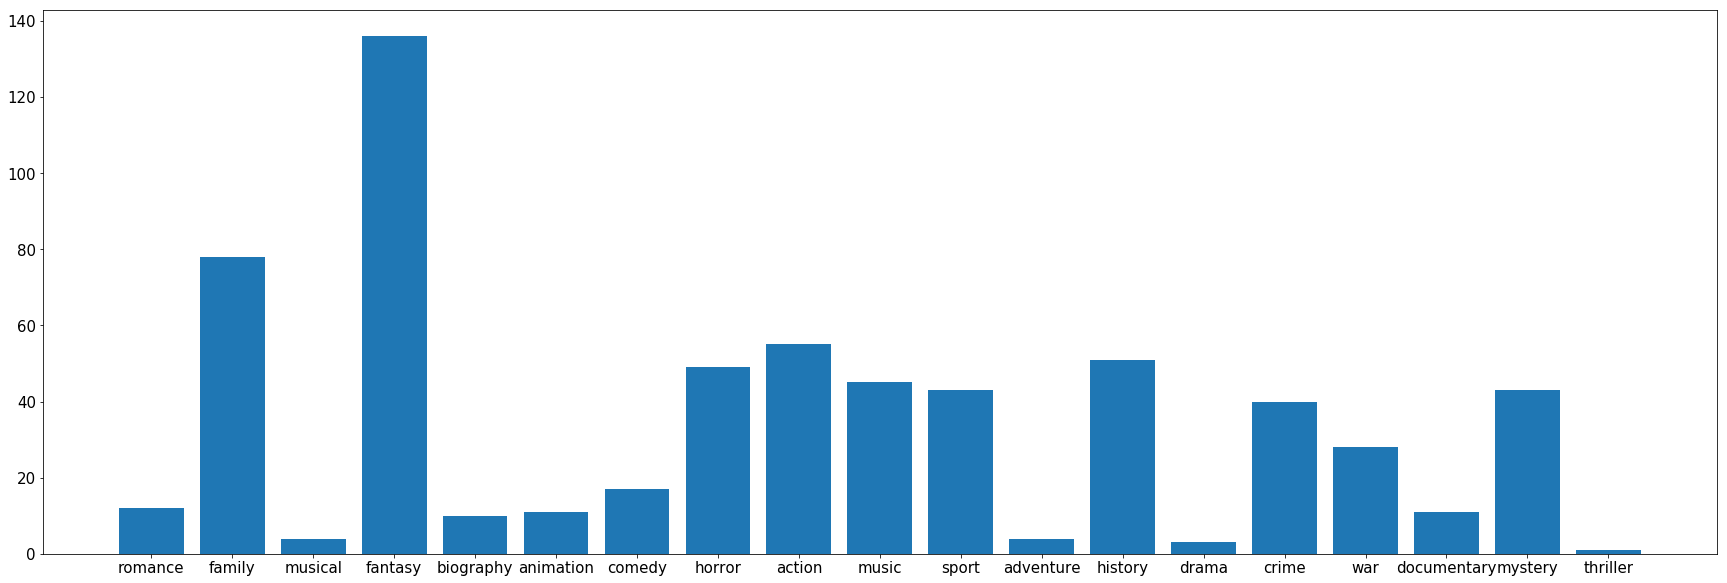

In [83]:
%matplotlib inline

counter = Counter(dict3.values())
print(counter)
plt.rcParams.update({'font.size': 15})
fig = plt.figure(figsize=(30,10))
ax = fig.add_subplot(111)

frequencies = list(counter.values())
names = list(counter.keys())
print (frequencies)
x_coordinates = np.arange(len(counter))
ax.bar(x_coordinates, frequencies, align='center')

ax.xaxis.set_major_locator(plt.FixedLocator(x_coordinates))
ax.xaxis.set_major_formatter(plt.FixedFormatter(names))
# plt.hist(freq.values())
plt.show()

# Now checking each dialogue with the genres of the movies

In [113]:
glist = mtm_df[mtm_df['Movie_Number'] == 'm101'].Genres
m1_df = mcm_df.loc[mcm_df['Movie_Number'] == 'm101']

In [114]:
list2 = []
for j in glist:
    j=j.replace('[',"")
    j=j.replace(']',"")
    j=j.replace("'","")
    j=j.split(", ")
    for items in j:
        list2.append(str(items))
print(list2)

['biography', 'drama', 'thriller']


In [115]:
# Dictionary for our genres
gdict = {}
for i in list2:
    try:
        gdict[i] = model[i]
    except:
        pass

In [117]:
new_df = pd.DataFrame(columns = ['Character_Id1', 'Character_Id2', 'Gender1', 
                                 'Gender2', 'List_of_Utterance', 'Movie_Number',
                                 'Movie_Title', 'Name1', 'Name2'])

In [118]:
new_df = new_df.append(mc1_df, ignore_index = True)

In [119]:
new_df.head()

,Character_Id1,Character_Id2,Gender1,Gender2,List_of_Utterance,Movie_Number,Movie_Title,Name1,Name2
0,u1485,u1510,NaN,NaN,"['L303685', 'L303686', 'L303687', 'L303688', '...",m101,NaN,NaN,NaN
1,u1485,u1510,NaN,NaN,"['L303691', 'L303692']",m101,NaN,NaN,NaN
2,u1485,u1510,NaN,NaN,"['L303697', 'L303698']",m101,NaN,NaN,NaN
3,u1485,u1510,NaN,NaN,"['L303700', 'L303701', 'L303702']",m101,NaN,NaN,NaN
4,u1485,u1510,NaN,NaN,"['L303713', 'L303714', 'L303715']",m101,NaN,NaN,NaN


In [121]:
for index, rows in new_df.iterrows():
    rows[2] = m1_df.loc[m1_df.Character_Id == rows[0], 'Gender'].iloc[0]
    rows[3] = m1_df.loc[m1_df.Character_Id == rows[1], 'Gender'].iloc[0]
    rows[6] = m1_df.loc[m1_df.Movie_Number == rows[5], 'Movie_Title'].iloc[0]
    rows[7] = m1_df.loc[m1_df.Character_Id == rows[0], 'Character_Name'].iloc[0]
    rows[8] = m1_df.loc[m1_df.Character_Id == rows[1], 'Character_Name'].iloc[0]

In [123]:
new_df.head()

,Character_Id1,Character_Id2,Gender1,Gender2,List_of_Utterance,Movie_Number,Movie_Title,Name1,Name2
0,u1485,u1510,f,m,"['L303685', 'L303686', 'L303687', 'L303688', '...",m101,the insider,BARBARA,WIGAND
1,u1485,u1510,f,m,"['L303691', 'L303692']",m101,the insider,BARBARA,WIGAND
2,u1485,u1510,f,m,"['L303697', 'L303698']",m101,the insider,BARBARA,WIGAND
3,u1485,u1510,f,m,"['L303700', 'L303701', 'L303702']",m101,the insider,BARBARA,WIGAND
4,u1485,u1510,f,m,"['L303713', 'L303714', 'L303715']",m101,the insider,BARBARA,WIGAND


In [128]:
mc1_df.shape

(171, 4)

In [129]:
tokenizer = RegexpTokenizer(r'\w+')

dict3 = {}
index1 = 0

# For a single dialogue
for index, rows in new_df.iterrows():
    s = rows[4]
    l = s.split('\'')[1::2]
    for _ in l:
        index1 += 1 
        val2 = {}
        av = np.zeros(300)
        line = ml1_df.loc[ml1_df['Line_Id'] == _, 'Dialogue'].iloc[0]
        print(line)
        line = tokenizer.tokenize(line)
        line = [i.lower() for i in line]
        line = [w for w in line if not w in stop_words]
#         print(line)
        l1 = len(line)
        for tokens in line:
#             print(model[tokens])
            try:
                av += model[tokens]
            except:
                l1 -= 1
                pass
        av = av/l1
#         print(av)
        # Cosine similarities
        for key, vals in gdict.items():
            try:
                val2[key] = 1 - spatial.distance.cosine(av, vals)
            except:
                pass
        print(val2)
        m = max(val2, key = val2.get)
        print(m, val2[m])
        dict3[index1] = m

Hi, honey.
{'biography': 0.04785720009970629, 'drama': 0.06401701809453852, 'thriller': 0.004567344694371145}
drama 0.06401701809453852
Hi, Daddy.
{'biography': 0.10064347467016588, 'drama': 0.08109690256317859, 'thriller': 0.019780477399112262}
biography 0.10064347467016588
What's new?
{'biography': 0.04101591170146379, 'drama': 0.022348680123552178, 'thriller': -0.03141202679589816}
biography 0.04101591170146379
Ms. Laufer gave me a star today.
{'biography': 0.07934640823322214, 'drama': 0.13356111098847667, 'thriller': 0.11747955769259166}
drama 0.13356111098847667
Yeah? What for?
{'biography': 0.05341691245346469, 'drama': 0.07775879573074529, 'thriller': 0.08534041590679708}
thriller 0.08534041590679708
For reading.
{'biography': 0.217723791047159, 'drama': 0.11771922298220205, 'thriller': 0.07211504388010237}
biography 0.217723791047159
That's great... Little early for cartoons, isn't it?
{'biography': 0.17478483495184616, 'drama': 0.1557852222763514, 'thriller': 0.09102229662243

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning:

invalid value encountered in true_divide




{'biography': nan, 'drama': nan, 'thriller': nan}
biography nan
Hey, it doesn't work? You've burned your bridges, man.
{'biography': 0.11881268191897099, 'drama': 0.07956356298288392, 'thriller': 0.10865097817545966}
biography 0.11881268191897099
You ready...?
{'biography': -0.03091315619727375, 'drama': 0.02132600787505612, 'thriller': -0.01730951378010137}
drama 0.02132600787505612
Okay... About this whistle-blower... Did Mike and Don go along with the corporate decision?
{'biography': 0.08092209105956039, 'drama': 0.06878278663837278, 'thriller': 0.0035506147423681744}
biography 0.08092209105956039
Lowell?
{'biography': -0.023060608544998695, 'drama': -0.017471857319564688, 'thriller': -0.02836624097931817}
drama -0.017471857319564688
Did I tell you you were wrong?
{'biography': 0.07061135817640818, 'drama': 0.07749752473261706, 'thriller': 0.026286288809306946}
drama 0.07749752473261706
No.  I'm assuming the cave-in begins with the threat of litigation from Big Tobacco. Are we tal

drama 0.1780511746232415
Like what? Corporate responsibility? What, are we talking celebrity here?
{'biography': 0.09675529377484127, 'drama': 0.12427722998181923, 'thriller': 0.01990946149160744}
drama 0.12427722998181923
I'm not talking celebrity, vanity, CBS. I'm talking about when you're nearer the end of your life than the beginning. Now, what do you think you think about then? The future? "In the future I'm going to do this? Become that?"  What "future"? No. What you think is: how will I be regarded in the end? After I'm gone.
{'biography': 0.131264486321512, 'drama': 0.19215870779018773, 'thriller': 0.07944374886711003}
drama 0.19215870779018773
Mike... in my...
{'biography': 0.04025372667471783, 'drama': 0.041806177347574414, 'thriller': -0.0840501776420548}
drama 0.041806177347574414
You and I have been doing this together for fourteen years.
{'biography': 0.0358305599581471, 'drama': 0.053450475278453924, 'thriller': 0.05855136200886413}
thriller 0.05855136200886413
That Cana

Everything... you... say! And I can't defend you, man, with one hand tied behind my back! Because you keep from me... what they can discover. And they will discover everything! Believe me.
{'biography': 0.09303140856032699, 'drama': 0.113935631411755, 'thriller': 0.14509006387262846}
thriller 0.14509006387262846
...I was young. I was young... confused... We didn't handle it the right way...
{'biography': 0.09163589434493247, 'drama': 0.14052551896090582, 'thriller': 0.07630933145836727}
drama 0.14052551896090582
She sued you for back payments of child support?
{'biography': 0.03934178411630751, 'drama': 0.07924235398157953, 'thriller': 0.038909393474789056}
drama 0.07924235398157953
She did not sue me. We had a dispute over money... I settled it, she dropped the complaint...  Any other questions?
{'biography': 0.062440472414024284, 'drama': 0.1811099012126136, 'thriller': 0.12908126737602577}
drama 0.1811099012126136
Yes. Did you lie about being on the American Judo Team in the Olympic

In [130]:
dict3

{1: 'drama',
 2: 'biography',
 3: 'biography',
 4: 'drama',
 5: 'thriller',
 6: 'biography',
 7: 'biography',
 8: 'thriller',
 9: 'drama',
 10: 'biography',
 11: 'drama',
 12: 'biography',
 13: 'drama',
 14: 'thriller',
 15: 'thriller',
 16: 'drama',
 17: 'drama',
 18: 'drama',
 19: 'drama',
 20: 'drama',
 21: 'biography',
 22: 'thriller',
 23: 'drama',
 24: 'drama',
 25: 'thriller',
 26: 'thriller',
 27: 'drama',
 28: 'drama',
 29: 'drama',
 30: 'drama',
 31: 'biography',
 32: 'biography',
 33: 'drama',
 34: 'thriller',
 35: 'thriller',
 36: 'drama',
 37: 'drama',
 38: 'drama',
 39: 'drama',
 40: 'thriller',
 41: 'thriller',
 42: 'thriller',
 43: 'biography',
 44: 'drama',
 45: 'drama',
 46: 'thriller',
 47: 'drama',
 48: 'biography',
 49: 'biography',
 50: 'biography',
 51: 'biography',
 52: 'thriller',
 53: 'drama',
 54: 'biography',
 55: 'drama',
 56: 'biography',
 57: 'biography',
 58: 'biography',
 59: 'drama',
 60: 'thriller',
 61: 'biography',
 62: 'drama',
 63: 'biography',
 6

In [131]:
# Visualization on the year of realese to get the idea of movie years we are working with
data = [go.Histogram(
            x = list(dict3.values()),
            y = list(dict3.keys()),
            marker = dict(color = 'rgb(0, 200, 200)'),
            hoverlabel = dict(bordercolor = 'rgb(0, 0, 0)')
        )]
layout = go.Layout(
    title='Year of Releases',
    xaxis=dict(
        title='Years'
    ),
    yaxis=dict(
        title='Counts of Movie Releases'
    ),
    bargap=0.2
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='simple-histogram1')